### Line notify

In [1]:
import sys
import requests
def notify(msg): # notify_img("message","Photo_name.ima")
    URL = "https://notify-api.line.me/api/notify"
    ACCESS_TOKEN = "aFWYN9vMcrTP5fiMFlWM0nG9JjW4wQ44SphnImYeDCU"
    MESSAGE_FIELD = {"message" : msg}
    LINE_HEADERS = { "Authorization": "Bearer " + ACCESS_TOKEN }
    try:
        response = requests.post( url=URL,headers=LINE_HEADERS,data=MESSAGE_FIELD)
#         print("Response HTTP Status Code: {status_code}".format( status_code=response.status_code))
    except requests.exceptions.RequestException:
        print("HTTP Request failed")

def notify_img(message,pic_name):
    url = "https://notify-api.line.me/api/notify"
    token = "aFWYN9vMcrTP5fiMFlWM0nG9JjW4wQ44SphnImYeDCU"
    headers = {"Authorization" : "Bearer "+ token}
    payload = {"message" :  message}
    files = {"imageFile": open(pic_name, "rb")}
    try:
        r = requests.post(url ,headers = headers ,params=payload, files=files)
#         print("Response HTTP Status Code: {status_code}".format( status_code=response.status_code))
    except requests.exceptions.RequestException:
        print("HTTP Request failed")

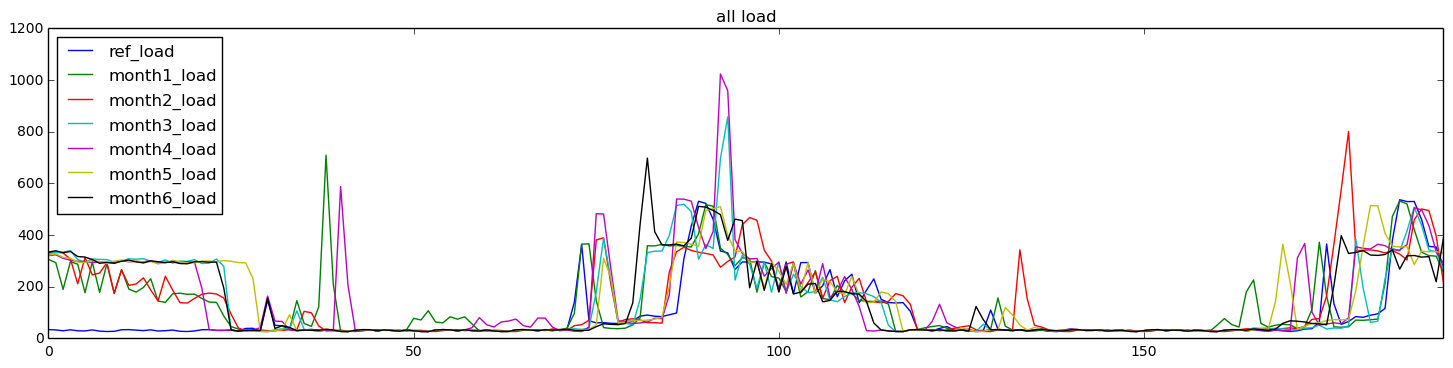

In [6]:
import pandas as pd
import MySQLdb
import numpy as np
import time
import datetime 
import random
import matplotlib.pyplot as plt
%matplotlib inline 

conn= MySQLdb.connect("localhost","conn","hems")
c = conn.cursor()
query0 =  "SELECT total_watt FROM thesis.measure_15devices_month0 WHERE Timestamp >= '2016-09-01 00:14:59' AND  Timestamp <= '2016-09-02 23:59:59';"
df0 = pd.read_sql(query0, conn)

query1 =  "SELECT total_watt FROM thesis.measure_15devices_month1 WHERE Timestamp >= '2016-10-01 00:14:59' AND  Timestamp <= '2016-10-02 23:59:59';"
df1 = pd.read_sql(query1, conn)

query2 =  "SELECT total_watt FROM thesis.measure_15devices_month2 WHERE Timestamp >= '2016-11-01 00:14:59' AND  Timestamp <= '2016-11-02 23:59:59';"
df2 = pd.read_sql(query2, conn)

query3=  "SELECT total_watt FROM thesis.measure_15devices_month3 WHERE Timestamp >= '2016-12-01 00:14:59' AND  Timestamp <= '2016-12-02 23:59:59';"
df3 = pd.read_sql(query3, conn)

query4 =  "SELECT total_watt FROM thesis.measure_15devices_month4 WHERE Timestamp >= '2017-01-01 00:14:59' AND  Timestamp <= '2017-01-02 23:59:59';"
df4 = pd.read_sql(query4, conn)

query5 =  "SELECT total_watt FROM thesis.measure_15devices_month5 WHERE Timestamp >= '2017-02-01 00:14:59' AND  Timestamp <= '2017-02-02 23:59:59';"
df5 = pd.read_sql(query5, conn)

query6 =  "SELECT total_watt FROM thesis.measure_15devices_month6 WHERE Timestamp >= '2017-03-01 00:14:59' AND  Timestamp <= '2017-03-02 23:59:59';"
df6 = pd.read_sql(query6, conn)

fig, ax = plt.subplots(figsize=(9*2, 4*1))
ax.set_title('all load')
df0['ref_load'] = df0.total_watt
df0 = df0.drop('total_watt', 1)
df0['month1_load'] = df1.total_watt
df0['month2_load'] = df2.total_watt
df0['month3_load'] = df3.total_watt
df0['month4_load'] = df4.total_watt
df0['month5_load'] = df5.total_watt
df0['month6_load'] = df6.total_watt

df1.to_csv('load.csv')

df0.plot(ax=ax )
plt.show()
fig.savefig('photo.jpg')
notify_img("all load","photo.jpg")

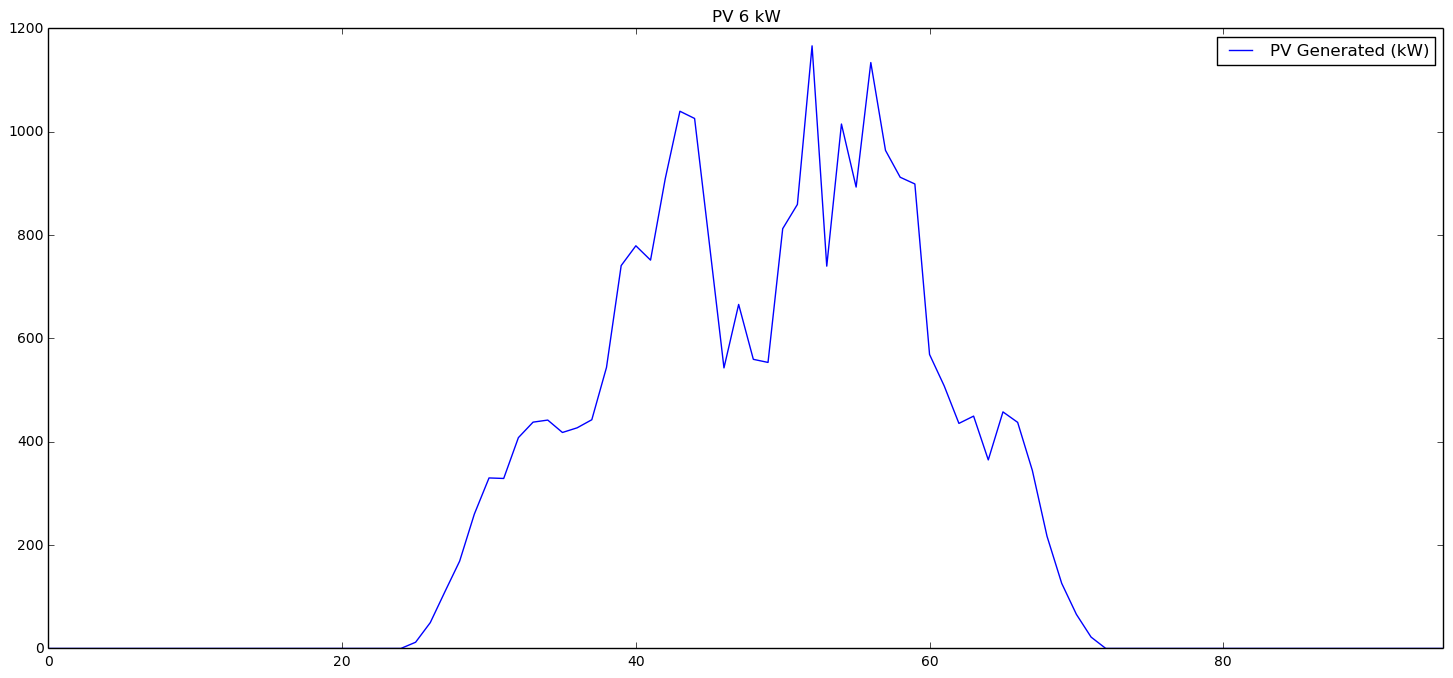

In [43]:
import pandas as pd
import MySQLdb
import numpy as np
import time
import datetime 
import random
import matplotlib.pyplot as plt
%matplotlib inline 

conn= MySQLdb.connect("localhost","conn","hems")
c = conn.cursor()

query1 =  "SELECT PV FROM thesis.PV WHERE Timestamp >= '2016-10-01 00:14:59' AND  Timestamp <= '2016-10-01 23:59:59';"
df1 = pd.read_sql(query1, conn)
df1['PV'] = df1.PV*2


fig, ax = plt.subplots(figsize=(9*2, 4*2))
ax.set_title('PV 6 kW')
df1['PV Generated (kW)'] = df1.PV
df1 = df1.drop('PV', 1)
df1.plot(ax=ax )
plt.show()


In [48]:
conn= MySQLdb.connect("localhost","conn","hems")
c = conn.cursor()

query1 =  "SELECT Timestamp,PV FROM thesis.PV WHERE Timestamp >= '2016-10-01 12:14:59' AND  Timestamp <= '2016-10-01 23:59:59';"
df1 = pd.read_sql(query1, conn)
df1['PV'] = df1.PV*2
print df1

             Timestamp        PV
0  2016-10-01 12:14:59   559.584
1  2016-10-01 12:29:59   553.584
2  2016-10-01 12:44:59   812.416
3  2016-10-01 12:59:59   859.334
4  2016-10-01 13:14:59  1166.334
5  2016-10-01 13:29:59   739.916
6  2016-10-01 13:44:59  1015.000
7  2016-10-01 13:59:59   893.000
8  2016-10-01 14:14:59  1134.000
9  2016-10-01 14:29:59   964.000
10 2016-10-01 14:44:59   912.000
11 2016-10-01 14:59:59   899.000
12 2016-10-01 15:14:59   569.000
13 2016-10-01 15:29:59   508.000
14 2016-10-01 15:44:59   435.584
15 2016-10-01 15:59:59   449.666
16 2016-10-01 16:14:59   364.916
17 2016-10-01 16:29:59   457.834
18 2016-10-01 16:44:59   437.584
19 2016-10-01 16:59:59   344.584
20 2016-10-01 17:14:59   217.166
21 2016-10-01 17:29:59   126.000
22 2016-10-01 17:44:59    66.000
23 2016-10-01 17:59:59    22.000
24 2016-10-01 18:14:59     0.000
25 2016-10-01 18:29:59     0.000
26 2016-10-01 18:44:59     0.000
27 2016-10-01 18:59:59     0.000
28 2016-10-01 19:14:59     0.000
29 2016-10

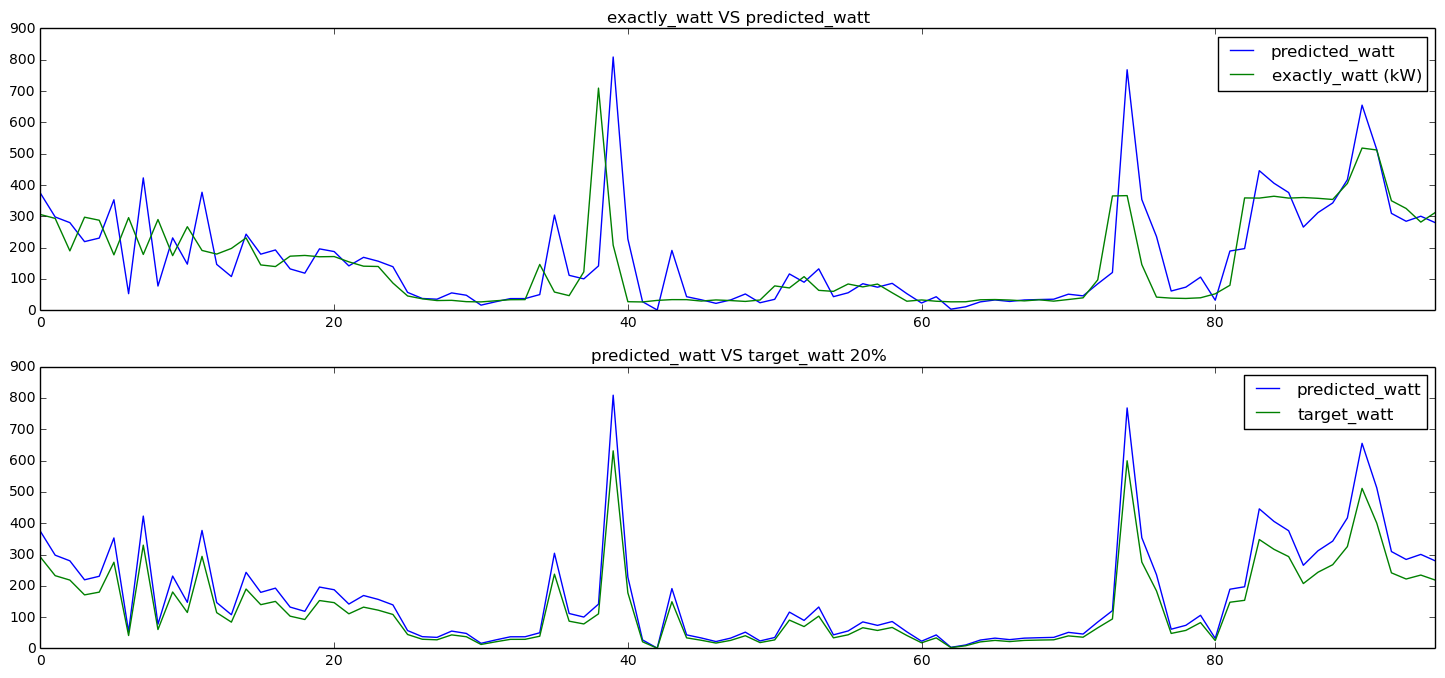

In [68]:
import pandas as pd
import MySQLdb
import numpy as np
import time
import datetime 
import random
import matplotlib.pyplot as plt
%matplotlib inline 
conn= MySQLdb.connect("localhost","conn","hems")
c = conn.cursor()

query1 =  "SELECT Timestamp,old_watt,predicted_watt,target_watt FROM thesis.amain_20 WHERE Timestamp >= '2016-10-01 00:14:59' AND  Timestamp <= '2016-10-01 23:59:59';"
df1 = pd.read_sql(query1, conn)

result = pd.concat([df1.old_watt, df1.predicted_watt], axis=1, join='inner')   
result['exactly_watt (kW)'] =result.old_watt
result = result.drop('old_watt', 1)

result2 = pd.concat([ df1.predicted_watt,df1.target_watt], axis=1, join='inner')   

fig,(ax1,ax2) = plt.subplots(nrows=2,figsize=(9*2, 4*2))
result.plot(ax=ax1)
result2.plot(ax=ax2)
ax1.set_title('exactly_watt VS predicted_watt ')
ax2.set_title('predicted_watt VS target_watt 20%')
plt.show()



In [67]:
import pandas as pd
import MySQLdb
import numpy as np
import time
import datetime 
import random
import matplotlib.pyplot as plt
%matplotlib inline 
conn= MySQLdb.connect("localhost","conn","hems")
c = conn.cursor()

query1 =  "SELECT Timestamp,old_watt,predicted_watt,target_watt FROM thesis.amain_20 WHERE Timestamp >= '2016-10-01 00:14:59' AND  Timestamp <= '2016-10-30 23:59:59';"
df1 = pd.read_sql(query1, conn)

print df1.old_watt.sum()
print df1.predicted_watt.sum()
print df1.target_watt.sum()

print (df1.old_watt.sum()-df1.target_watt.sum())/df1.old_watt.sum()


372829.0459
405269.691946
316223.737927
0.151826443232


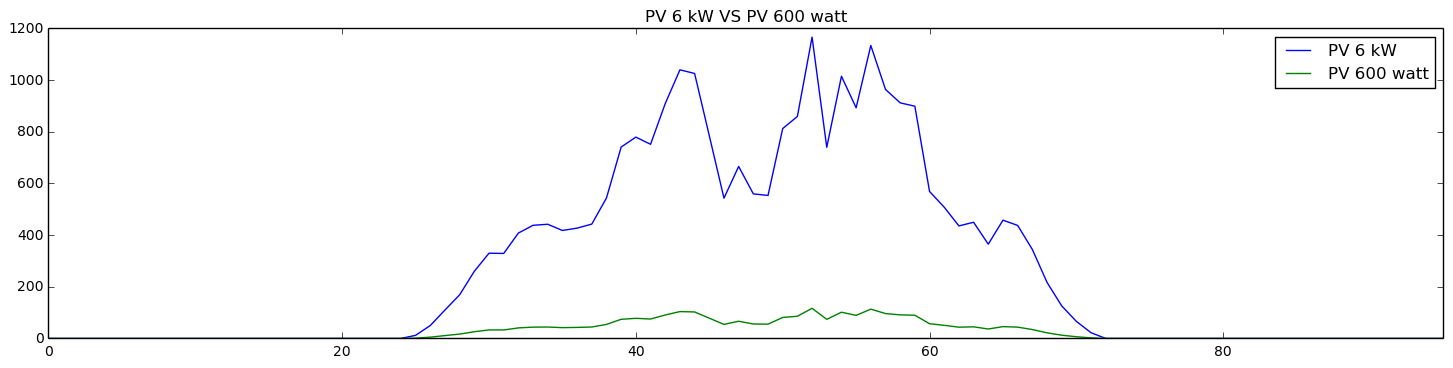

In [76]:
import pandas as pd
import MySQLdb
import numpy as np
import time
import datetime 
import random
import matplotlib.pyplot as plt
%matplotlib inline 

conn= MySQLdb.connect("localhost","conn","hems")
c = conn.cursor()

query1 =  "SELECT PV FROM thesis.PV WHERE Timestamp >= '2016-10-01 00:14:59' AND  Timestamp <= '2016-10-01 23:59:59';"
df1 = pd.read_sql(query1, conn)
df1['PV 6 kW'] = (df1.PV*2)
df1['PV 600 watt'] = ((df1.PV/10)*2)
fig, ax = plt.subplots(figsize=(9*2, 4*1))
ax.set_title('PV 6 kW VS PV 600 watt')
# df1['PV Generated (watt)'] = df1.PV
df1 = df1.drop('PV', 1)
df1.plot(ax=ax )
plt.show()


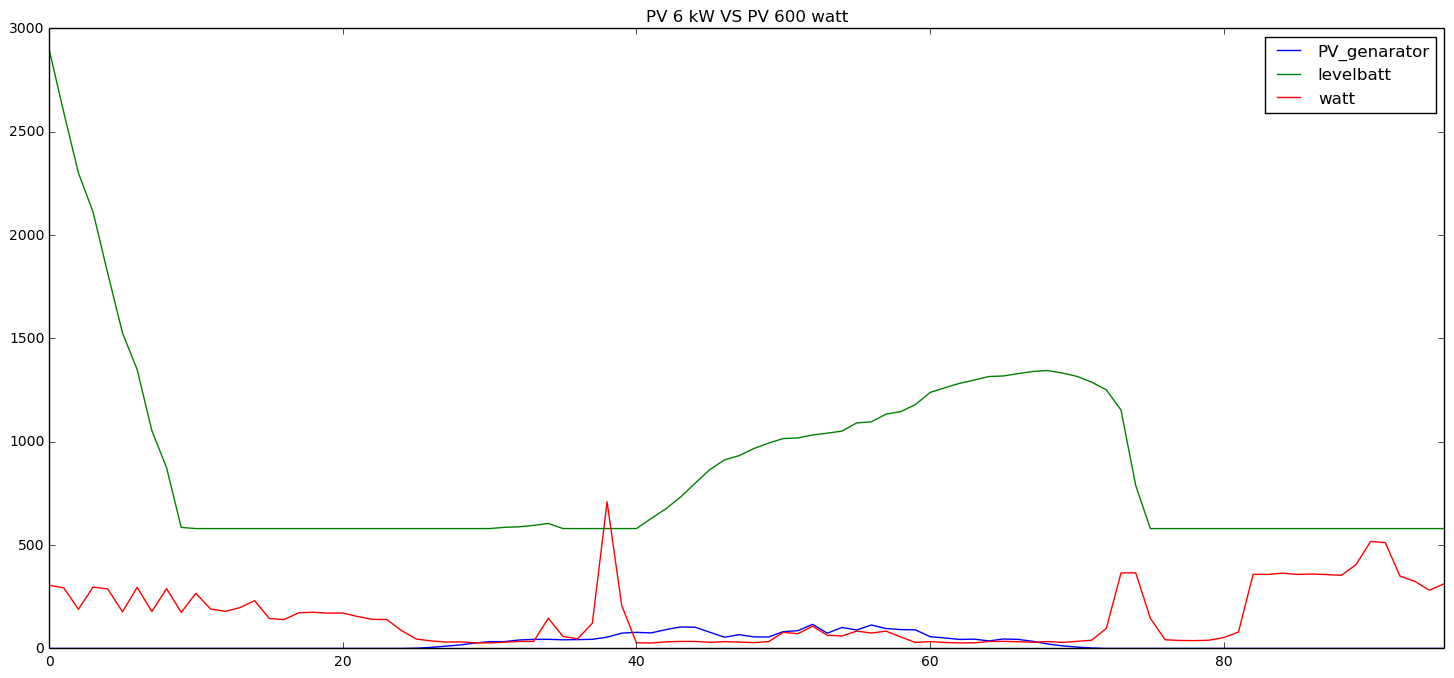

In [75]:
import pandas as pd
import MySQLdb
import numpy as np
import time
import datetime 
import random
import matplotlib.pyplot as plt
%matplotlib inline 

conn= MySQLdb.connect("localhost","conn","hems")
c = conn.cursor()

query1 =  "SELECT PV_genarator,levelbatt,watt FROM thesis.amain_20 WHERE Timestamp >= '2016-10-01 00:14:59' AND  Timestamp <= '2016-10-01 23:59:59';"
df1 = pd.read_sql(query1, conn)
# df1['PV 6 kW'] = (df1.PV*2)
# df1['PV 600 watt'] = ((df1.PV/10)*2)
fig, ax = plt.subplots(figsize=(9*2, 4*2))
ax.set_title('PV 6 kW VS PV 600 watt')
# df1['PV Generated (watt)'] = df1.PV
# df1 = df1.drop('PV', 1)
df1.plot(ax=ax )
plt.show()


.DONE!


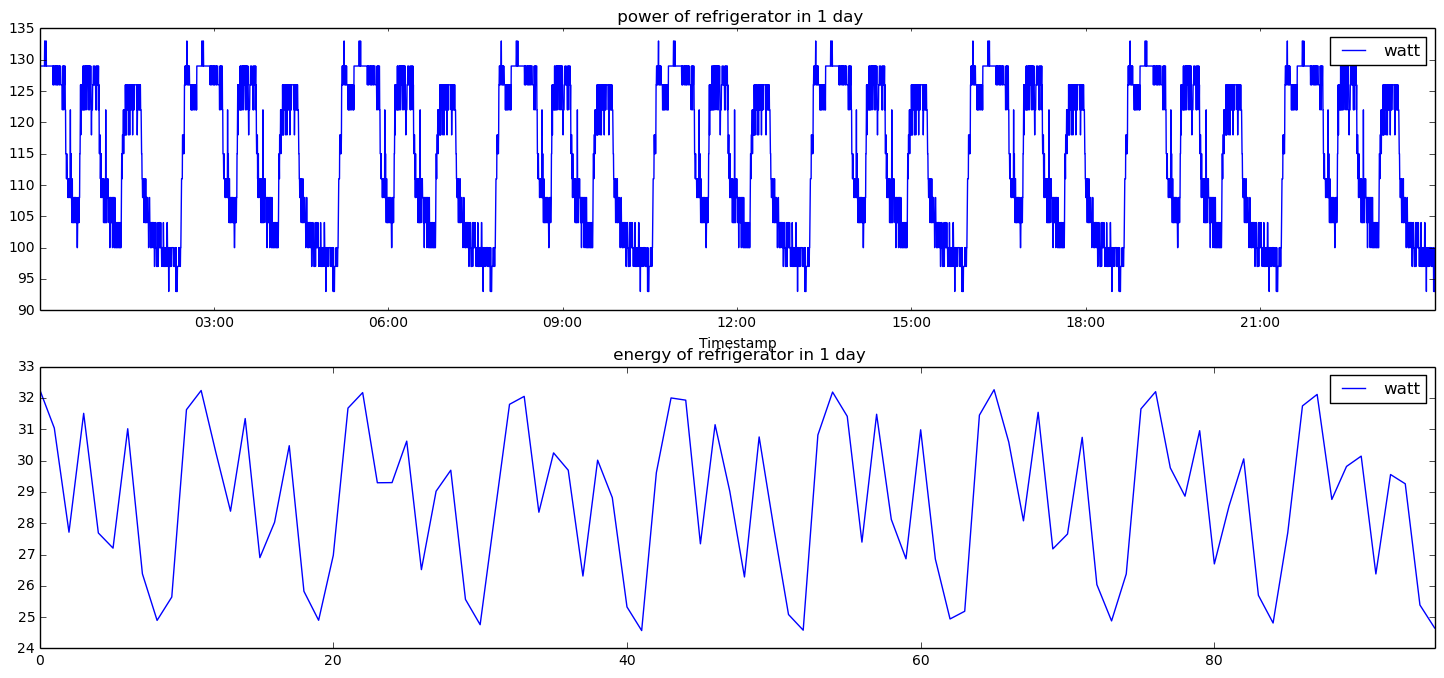

In [138]:
import pandas as pd
import MySQLdb
import numpy as np
import time
import datetime 
import random
import matplotlib.pyplot as plt



# Set parameters
j = 0
d = 1#Day

# CONNECT TO MYSQL
conn= MySQLdb.connect("localhost","conn","hems","power")
c = conn.cursor()

# set 15 mins periods 
time_a = pd.date_range('2016-09-01', periods=96*d, freq='15T')
time_b = pd.date_range('2016-09-01 00:14:59', periods=96*d, freq='15T')

power1 = []
po = []
query0= "SELECT Timestamp,watt FROM data_month0.refrigurator WHERE Timestamp >= '2016-09-01 00:00:00' AND TimeStamp <= '2016-09-01 23:59:59'; "
df1 = pd.read_sql(query0, conn , index_col=['Timestamp'])
while (j <= (96*d)-1):
    # device1
    query0= "SELECT Timestamp,watt FROM data_month0.refrigurator WHERE Timestamp >= '%s' AND TimeStamp <= '%s'; "% (time_a[j],time_b[j])
    df_refrigurator = pd.read_sql(query0, conn)
    po.append(time_b[j])
    power1.append(df_refrigurator.sum()/len(df_refrigurator)/4 )
    j += 1 
print(".DONE!")

df2 = pd.DataFrame(power1)
df3 = pd.DataFrame(po)
df3.columns = ['Timestamp']
result = pd.concat([ df3.Timestamp,df2.watt], axis=1, join='inner')
fig,(ax1,ax2) = plt.subplots(nrows=2,figsize=(9*2, 4*2))
df1.plot(ax=ax1)
result.plot(ax=ax2)
ax1.set_title(' power of refrigerator in 1 day')
ax2.set_title(' energy of refrigerator in 1 day')
plt.show()



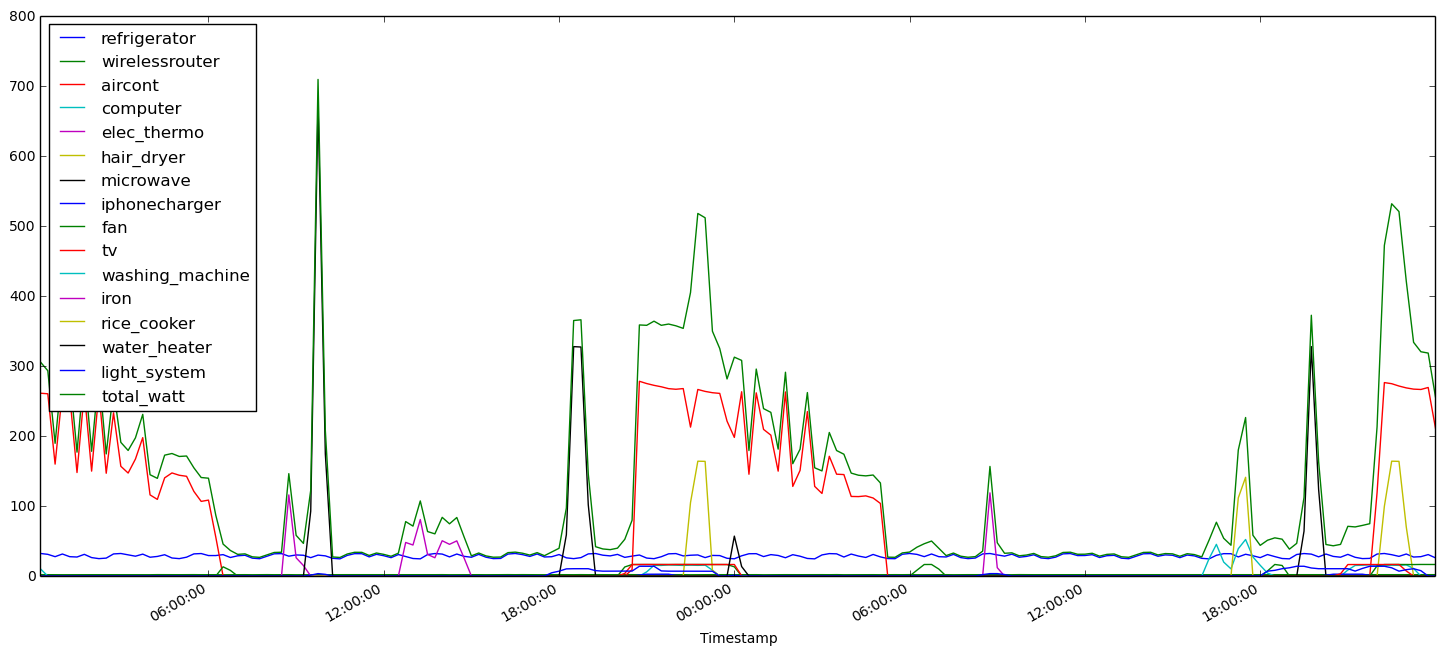

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import MySQLdb
import time

from sympy import *
from sympy.solvers import solve
from sympy.parsing.sympy_parser import parse_expr

# Set parameters
j = 0
d = 1#Day

# CONNECT TO MYSQL
conn= MySQLdb.connect("localhost","conn","hems","power")
c = conn.cursor()

# set 15 mins periods 
query0= "SELECT * FROM final_data.alldata_month1 WHERE Timestamp >= '2016-10-01 00:00:00' AND TimeStamp <= '2016-10-02 23:59:59'; "
df1 = pd.read_sql(query0, conn , index_col=['Timestamp'])
fig,ax = plt.subplots(figsize=(9*2, 4*2))
df1.plot(ax=ax)
plt.show()


                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -7.000
Date:                Thu, 25 May 2017   Prob (F-statistic):               1.00
Time:                        19:38:24   Log-Likelihood:                 287.06
No. Observations:                   9   AIC:                            -570.1
Df Residuals:                       7   BIC:                            -569.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0000      2e-14   2.49e+14      0.0

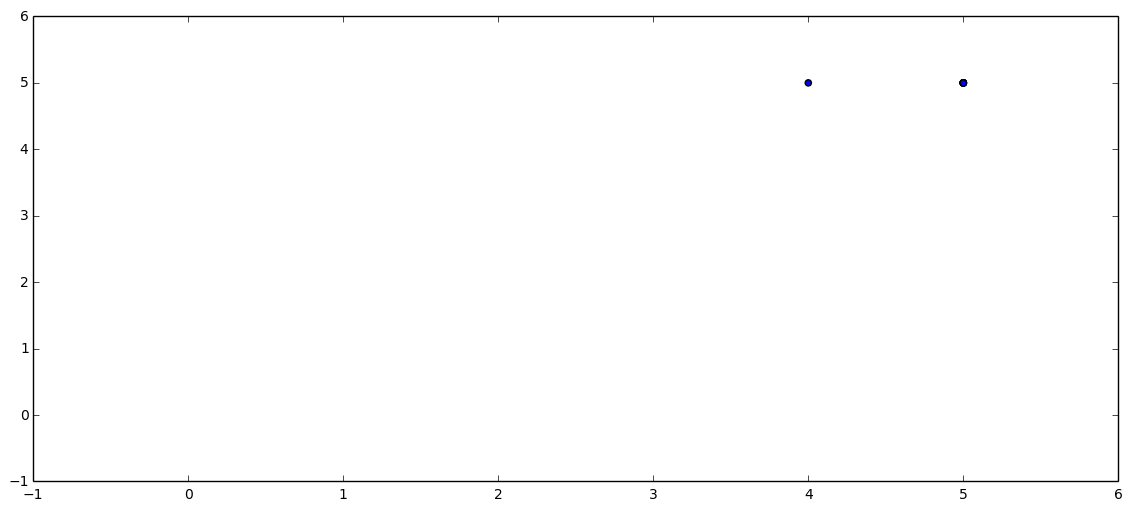

In [172]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd # v. 1.7
import MySQLdb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error,mean_squared_error
import statistics 
%matplotlib inline 

j = 0
d = 30 #Day

# CONNECT TO MYSQL
conn= MySQLdb.connect("localhost","conn","hems")
c = conn.cursor()

query0= "SELECT total_watt FROM thesis.load WHERE Timestamp >= '2016-09-01 00:00:00' AND TimeStamp <= '2016-09-30 23:59:59'; "
df0 = pd.read_sql(query0, conn )
query1= "SELECT total_watt FROM thesis.load WHERE Timestamp >= '2016-10-01 00:00:00' AND TimeStamp <= '2016-10-30 23:59:59'; "
df1 = pd.read_sql(query1, conn)
#  , index_col=['Timestamp']
# result = pd.concat([ df0.total_watt,df1.total_watt], axis=1, join='inner')
# print result

# X = df0.total_watt
# Y = df1.total_watt
X = [6,7,8,9]
X = pd.DataFrame(X)
# Y = [10,10,10,10,10,10,10,10,10]
Y = [5,4,3,5,5,5,5,5,5]
Y = pd.DataFrame(Y)
results = sm.OLS(Y,sm.add_constant(X)).fit()
print results.summary()
plt.figure(figsize=(14,6))
plt.scatter(X,Y)
X_plot = np.linspace(0,1000,1)
plt.plot(X_plot, X_plot*results.params[0] + results.params[1])

In [162]:
print type(Y)

<type 'list'>


In [187]:
import numpy as np
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[result.size/2:]
autocorr(X)
# X = [6,7,8,9]
# Y = [5,4,3,5]
# # print np.correlate(X,Y,mode='full')
# print np.corroef

array([230, 170, 111,  54])

0
0  4
1  5
2  5
3  5
4  5
5  5
6  5
7  5
8  5